In [5]:
!pip install torchvision tensorboardx jupyter matplotlib numpy

     |████████████████████████████████| 204kB 2.7MB/s 


In [0]:
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
from utils import Logger


In [0]:
def mnist_data():
    compose = transforms.Compose([
        transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
    out_dir = '{}/dataset'.format("./")
    return datasets.MNIST(root=out_dir, train=True, transform=compose, download=True)

In [0]:
# Load data
data = mnist_data()

In [26]:
# Create loader with data, so that we can iterate over it
data_loader = torch.utils.data.DataLoader(data, batch_size=100, shuffle=True)
# Num batches
num_batches = len(data_loader)
num_batches

600

In [0]:
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 784
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
discriminator = DiscriminatorNet()

In [0]:
def images_to_vectors(images):
    return images.view(images.size(0), 784)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

In [0]:
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 784
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
generator = GeneratorNet()

In [0]:
def noise(size):
    '''
    Generates a 1-d vector of gaussian sampled random values
    '''
    n = Variable(torch.randn(size, 100))
    return n

In [0]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

In [0]:
loss = nn.BCELoss()


In [0]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    return data

In [0]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [0]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [0]:
num_test_samples = 16
test_noise = noise(num_test_samples)

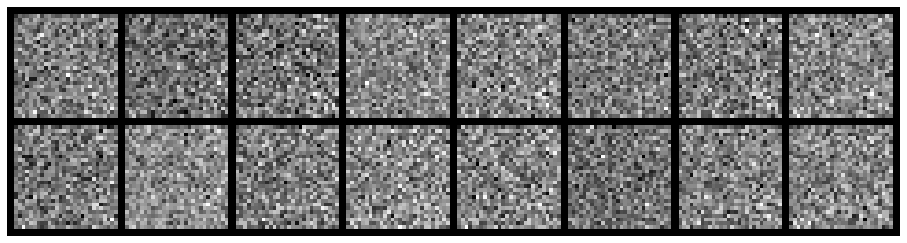

Epoch: [0/200], Batch Num: [0/600]
Discriminator Loss: 1.3489, Generator Loss: 0.7134
D(x): 0.5088, D(G(z)): 0.4898


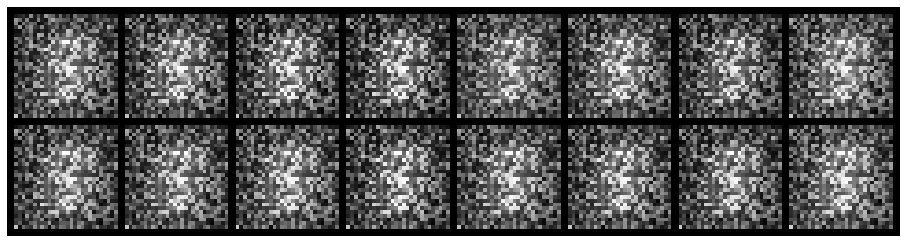

Epoch: [0/200], Batch Num: [100/600]
Discriminator Loss: 1.1889, Generator Loss: 1.9796
D(x): 0.6512, D(G(z)): 0.3924


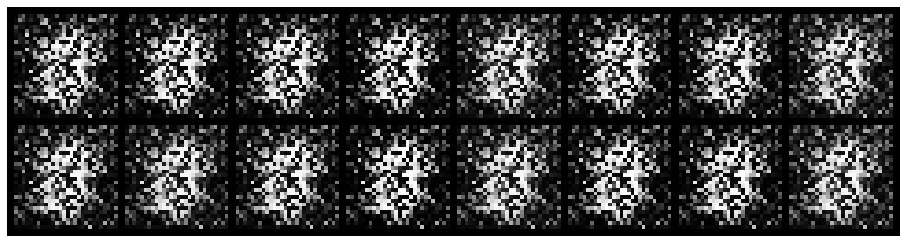

Epoch: [0/200], Batch Num: [200/600]
Discriminator Loss: 0.3662, Generator Loss: 3.1254
D(x): 0.9176, D(G(z)): 0.2133


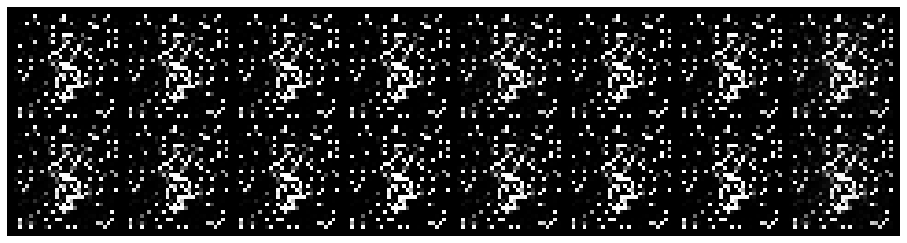

Epoch: [0/200], Batch Num: [300/600]
Discriminator Loss: 0.0618, Generator Loss: 4.9787
D(x): 0.9795, D(G(z)): 0.0373


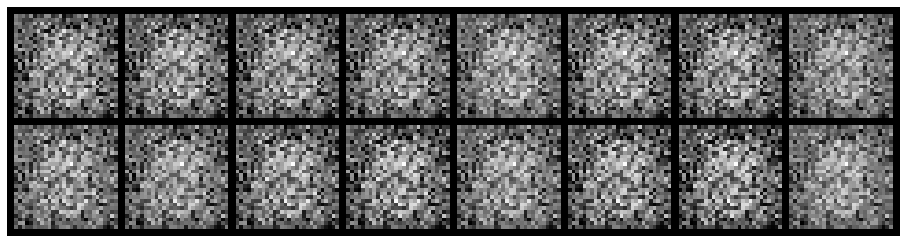

Epoch: [0/200], Batch Num: [400/600]
Discriminator Loss: 1.2343, Generator Loss: 0.8852
D(x): 0.8851, D(G(z)): 0.6404


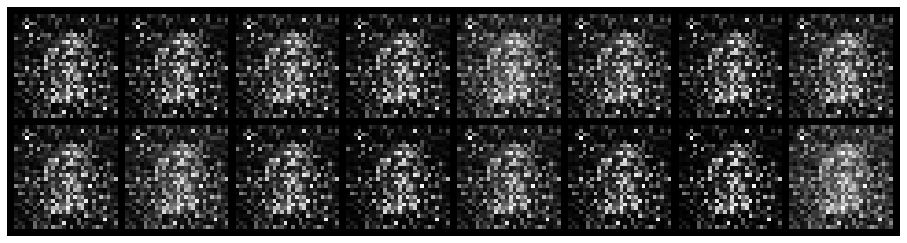

Epoch: [0/200], Batch Num: [500/600]
Discriminator Loss: 0.2540, Generator Loss: 4.5197
D(x): 0.9484, D(G(z)): 0.1558


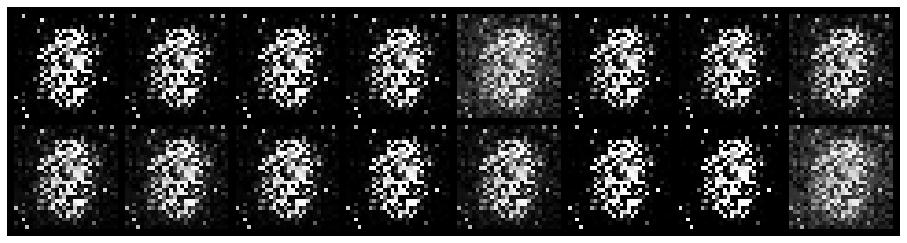

Epoch: [1/200], Batch Num: [0/600]
Discriminator Loss: 0.1540, Generator Loss: 8.8150
D(x): 0.9558, D(G(z)): 0.0722


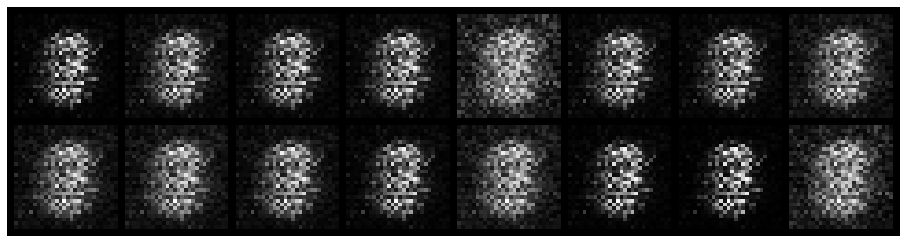

Epoch: [1/200], Batch Num: [100/600]
Discriminator Loss: 1.2086, Generator Loss: 2.5192
D(x): 0.7242, D(G(z)): 0.3774


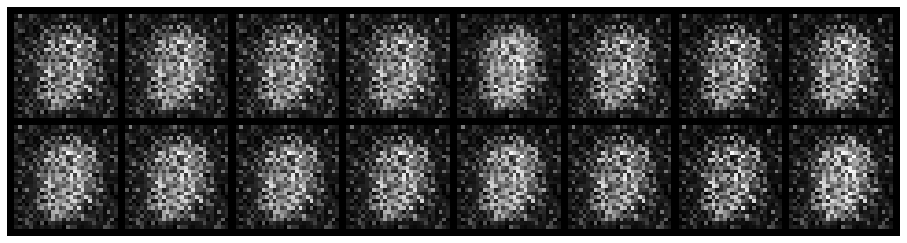

Epoch: [1/200], Batch Num: [200/600]
Discriminator Loss: 0.6720, Generator Loss: 3.9100
D(x): 0.8045, D(G(z)): 0.2031


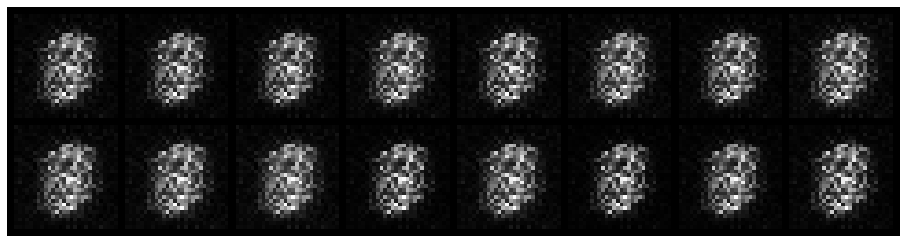

Epoch: [1/200], Batch Num: [300/600]
Discriminator Loss: 1.4053, Generator Loss: 2.5527
D(x): 0.6374, D(G(z)): 0.3827


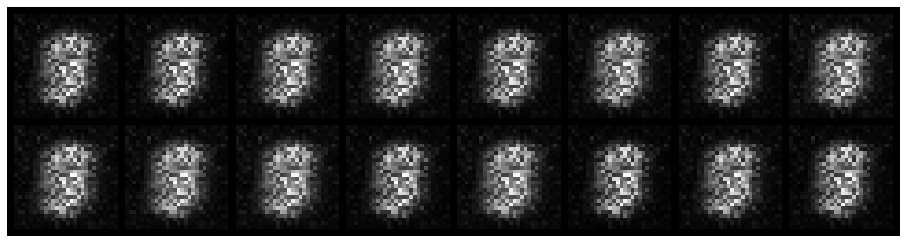

Epoch: [1/200], Batch Num: [400/600]
Discriminator Loss: 0.7117, Generator Loss: 2.5376
D(x): 0.8382, D(G(z)): 0.3175


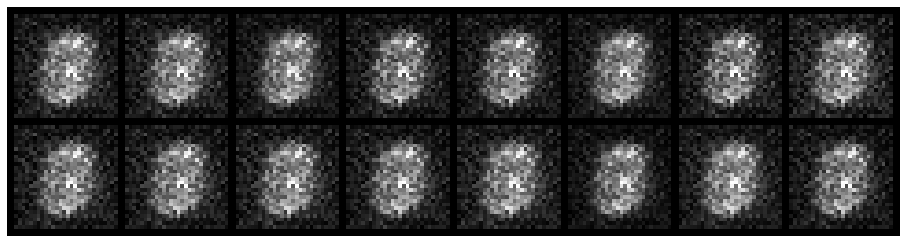

Epoch: [1/200], Batch Num: [500/600]
Discriminator Loss: 1.0337, Generator Loss: 1.5566
D(x): 0.6927, D(G(z)): 0.3392


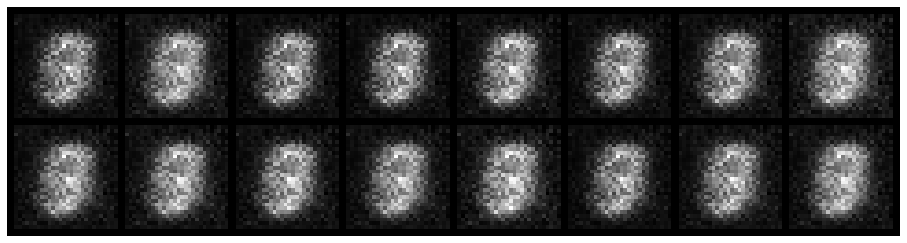

Epoch: [2/200], Batch Num: [0/600]
Discriminator Loss: 0.6169, Generator Loss: 2.2428
D(x): 0.7166, D(G(z)): 0.1766


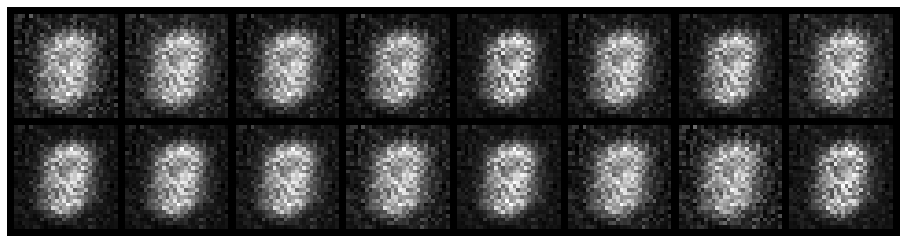

Epoch: [2/200], Batch Num: [100/600]
Discriminator Loss: 0.1220, Generator Loss: 4.5024
D(x): 0.9484, D(G(z)): 0.0362


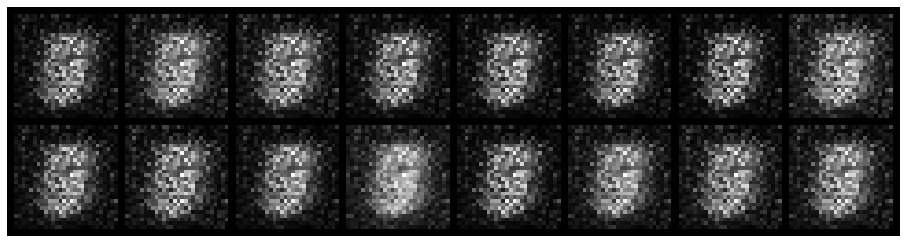

Epoch: [2/200], Batch Num: [200/600]
Discriminator Loss: 0.2603, Generator Loss: 3.4157
D(x): 0.9118, D(G(z)): 0.1027


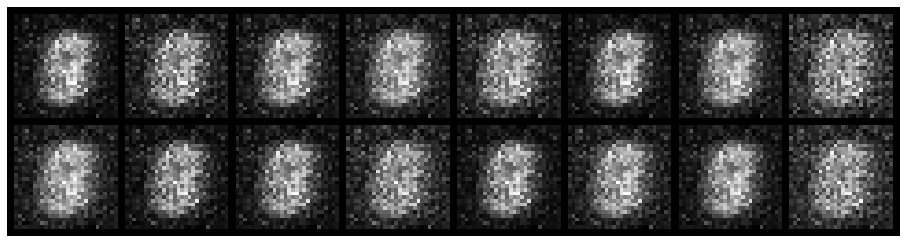

Epoch: [2/200], Batch Num: [300/600]
Discriminator Loss: 0.6284, Generator Loss: 1.9258
D(x): 0.8947, D(G(z)): 0.3034


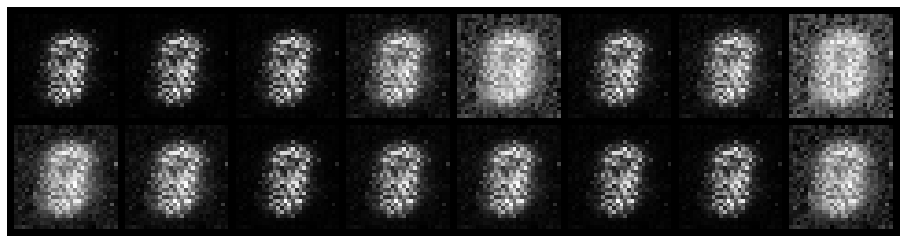

Epoch: [2/200], Batch Num: [400/600]
Discriminator Loss: 0.3752, Generator Loss: 3.1985
D(x): 0.9124, D(G(z)): 0.1027


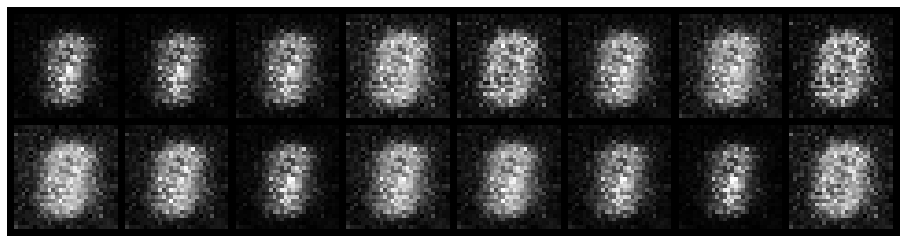

Epoch: [2/200], Batch Num: [500/600]
Discriminator Loss: 0.1369, Generator Loss: 4.3064
D(x): 0.9382, D(G(z)): 0.0309


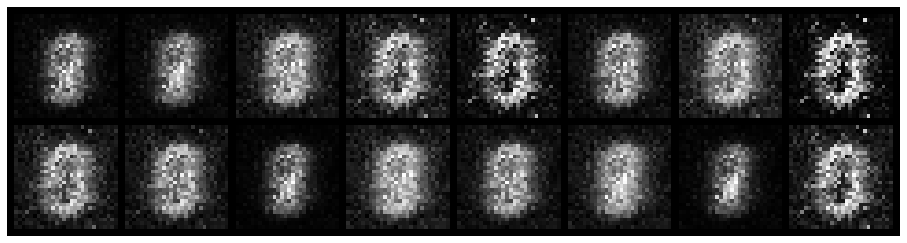

Epoch: [3/200], Batch Num: [0/600]
Discriminator Loss: 0.2489, Generator Loss: 3.6041
D(x): 0.9328, D(G(z)): 0.0950


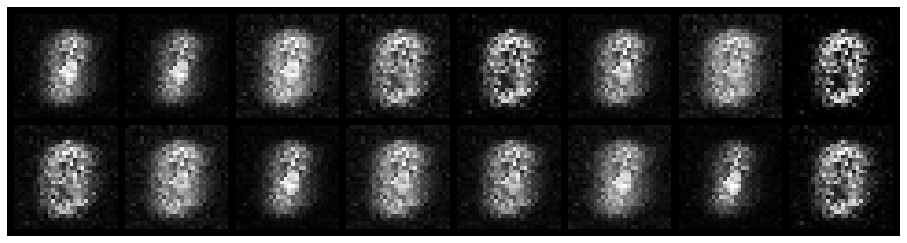

Epoch: [3/200], Batch Num: [100/600]
Discriminator Loss: 0.2344, Generator Loss: 4.2016
D(x): 0.9331, D(G(z)): 0.0633


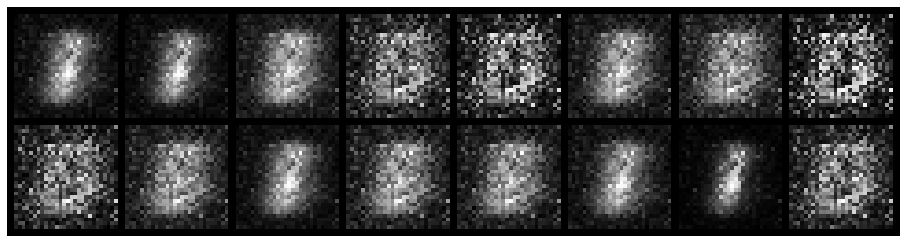

Epoch: [3/200], Batch Num: [200/600]
Discriminator Loss: 0.2311, Generator Loss: 3.3390
D(x): 0.9272, D(G(z)): 0.0744


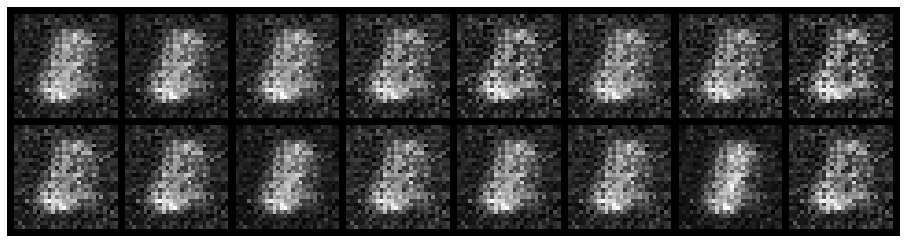

Epoch: [3/200], Batch Num: [300/600]
Discriminator Loss: 0.5311, Generator Loss: 3.1459
D(x): 0.9331, D(G(z)): 0.2225


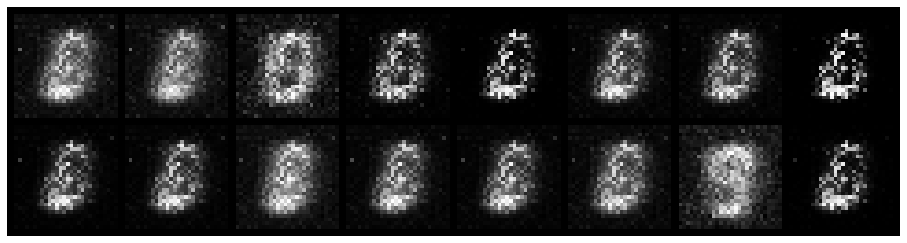

Epoch: [3/200], Batch Num: [400/600]
Discriminator Loss: 0.2970, Generator Loss: 4.8665
D(x): 0.8882, D(G(z)): 0.0686


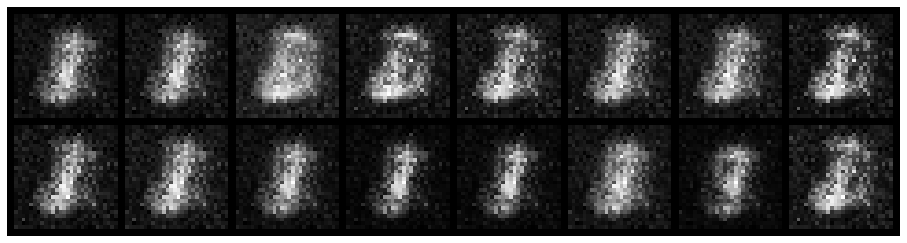

Epoch: [3/200], Batch Num: [500/600]
Discriminator Loss: 0.3601, Generator Loss: 3.1817
D(x): 0.9054, D(G(z)): 0.0926


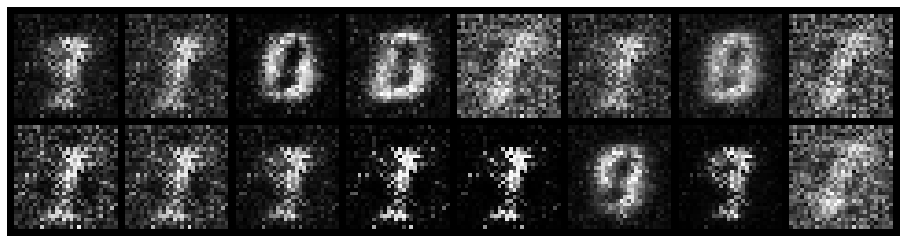

Epoch: [4/200], Batch Num: [0/600]
Discriminator Loss: 0.3586, Generator Loss: 3.2302
D(x): 0.9008, D(G(z)): 0.1377


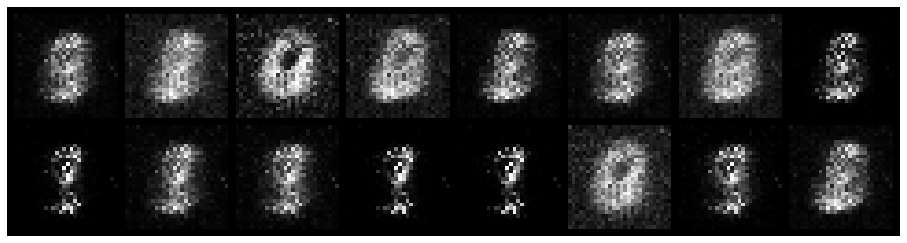

Epoch: [4/200], Batch Num: [100/600]
Discriminator Loss: 0.2269, Generator Loss: 3.1612
D(x): 0.9674, D(G(z)): 0.1194


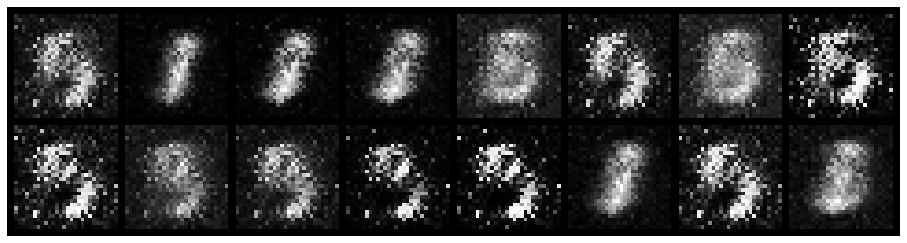

Epoch: [4/200], Batch Num: [200/600]
Discriminator Loss: 0.3549, Generator Loss: 5.4526
D(x): 0.9164, D(G(z)): 0.1086


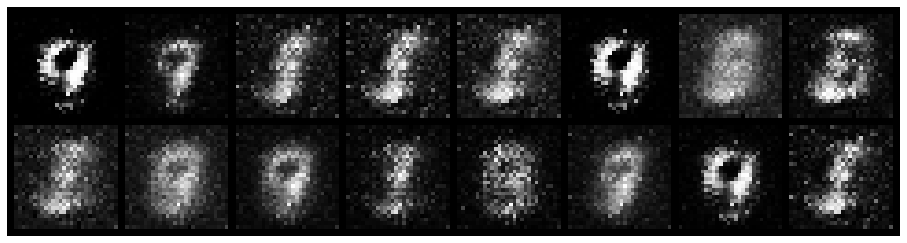

Epoch: [4/200], Batch Num: [300/600]
Discriminator Loss: 0.4415, Generator Loss: 4.1327
D(x): 0.8345, D(G(z)): 0.0648


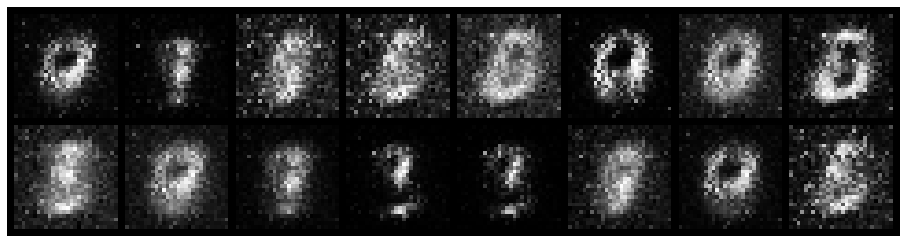

Epoch: [4/200], Batch Num: [400/600]
Discriminator Loss: 0.4664, Generator Loss: 3.6142
D(x): 0.8515, D(G(z)): 0.1274


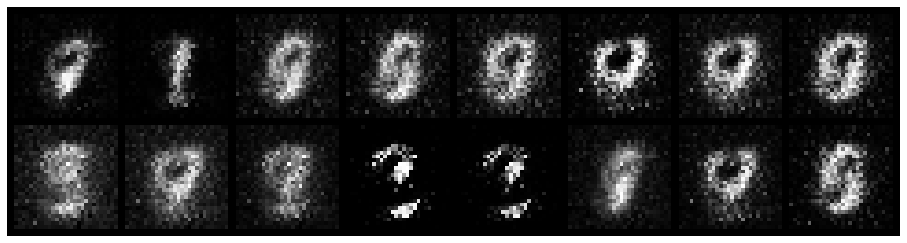

Epoch: [4/200], Batch Num: [500/600]
Discriminator Loss: 0.5245, Generator Loss: 2.8228
D(x): 0.8823, D(G(z)): 0.1845


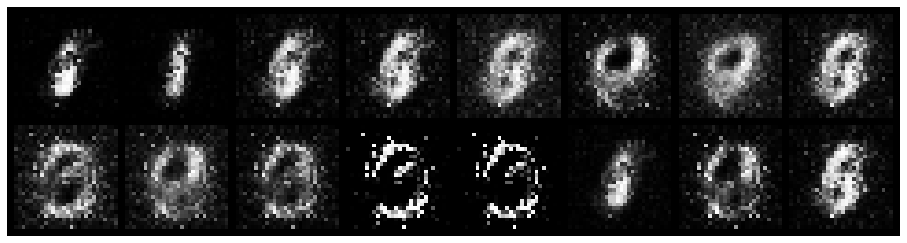

Epoch: [5/200], Batch Num: [0/600]
Discriminator Loss: 0.7936, Generator Loss: 2.5524
D(x): 0.7396, D(G(z)): 0.2073


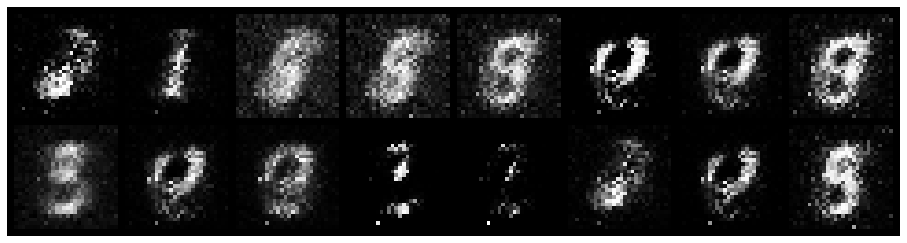

Epoch: [5/200], Batch Num: [100/600]
Discriminator Loss: 0.3325, Generator Loss: 4.0384
D(x): 0.9080, D(G(z)): 0.1080


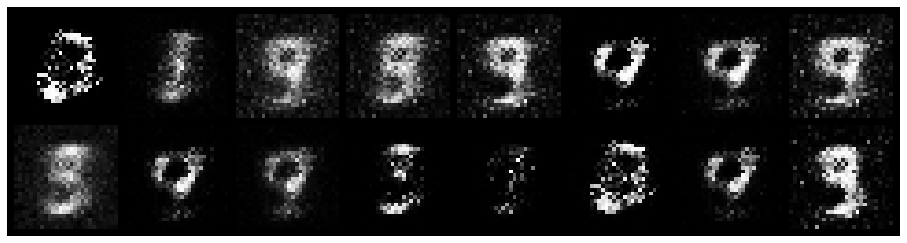

Epoch: [5/200], Batch Num: [200/600]
Discriminator Loss: 0.4587, Generator Loss: 3.3309
D(x): 0.8416, D(G(z)): 0.0989


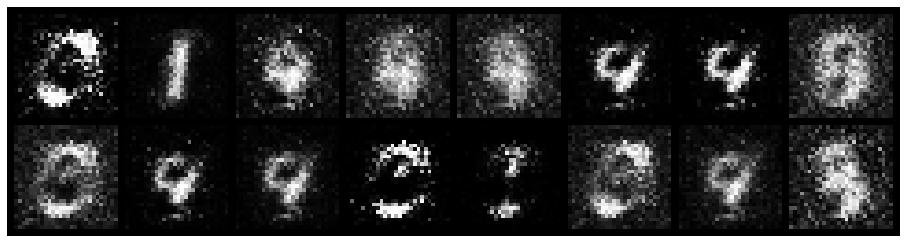

Epoch: [5/200], Batch Num: [300/600]
Discriminator Loss: 0.5605, Generator Loss: 3.4392
D(x): 0.7781, D(G(z)): 0.1012


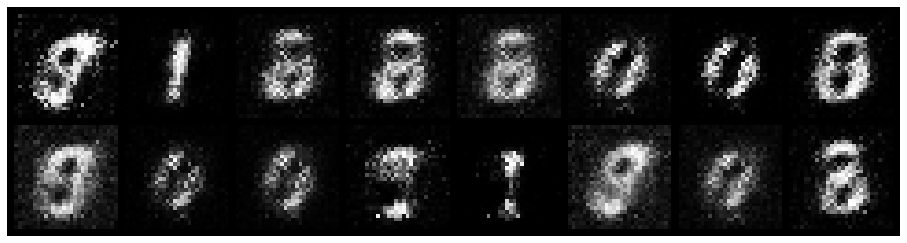

Epoch: [5/200], Batch Num: [400/600]
Discriminator Loss: 0.4516, Generator Loss: 3.7360
D(x): 0.8663, D(G(z)): 0.1113


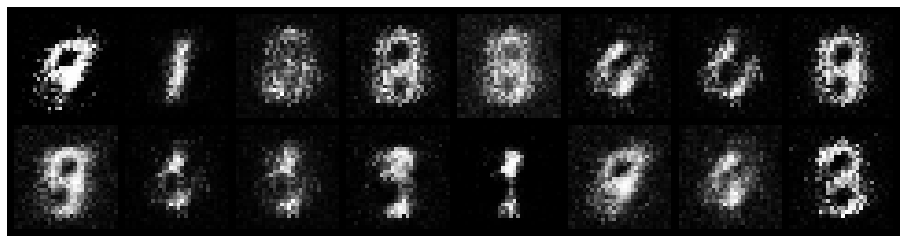

Epoch: [5/200], Batch Num: [500/600]
Discriminator Loss: 0.4935, Generator Loss: 3.0299
D(x): 0.8061, D(G(z)): 0.0660


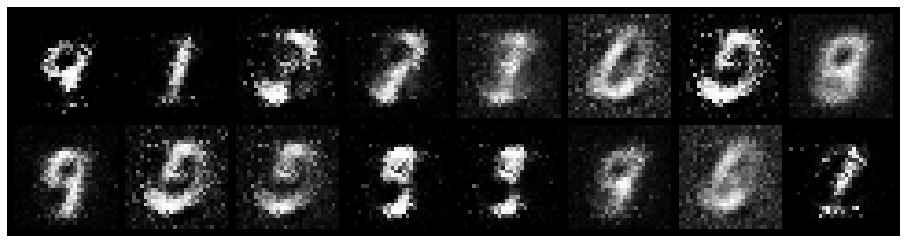

Epoch: [6/200], Batch Num: [0/600]
Discriminator Loss: 0.6488, Generator Loss: 3.5654
D(x): 0.8103, D(G(z)): 0.1981


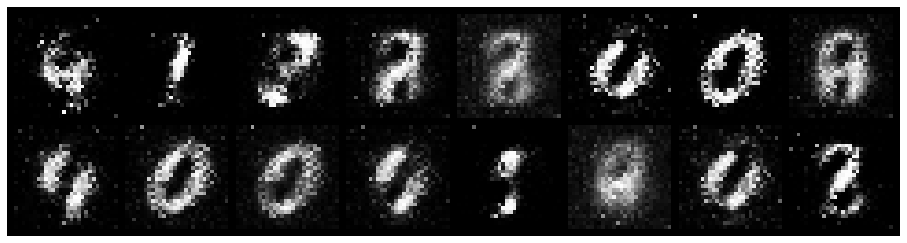

Epoch: [6/200], Batch Num: [100/600]
Discriminator Loss: 0.6878, Generator Loss: 2.4014
D(x): 0.8275, D(G(z)): 0.2031


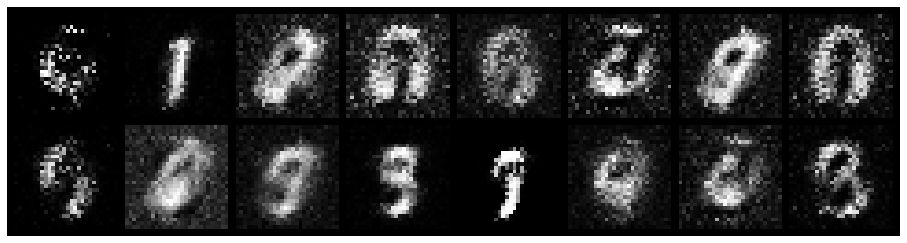

Epoch: [6/200], Batch Num: [200/600]
Discriminator Loss: 0.5077, Generator Loss: 3.3501
D(x): 0.8431, D(G(z)): 0.1569


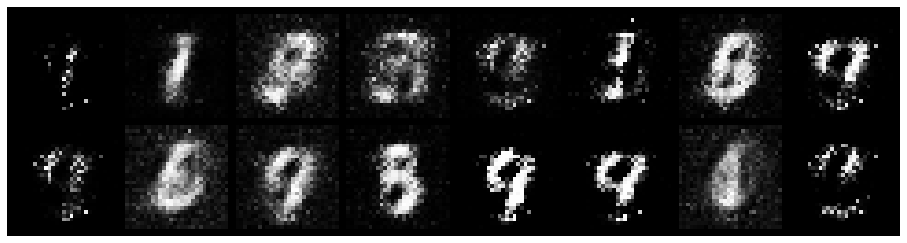

Epoch: [6/200], Batch Num: [300/600]
Discriminator Loss: 0.3427, Generator Loss: 3.1237
D(x): 0.8542, D(G(z)): 0.0811


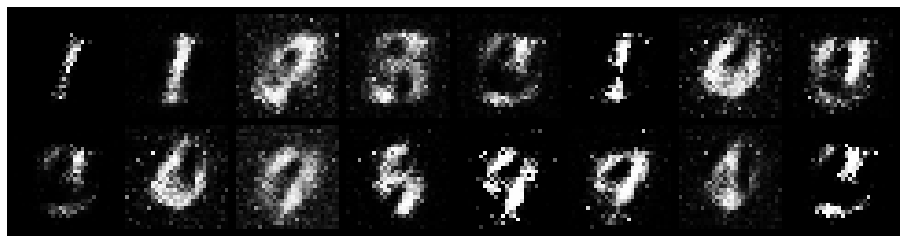

Epoch: [6/200], Batch Num: [400/600]
Discriminator Loss: 0.4938, Generator Loss: 2.5584
D(x): 0.8908, D(G(z)): 0.2231


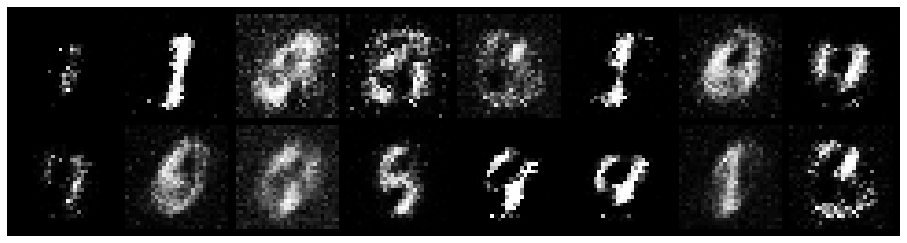

Epoch: [6/200], Batch Num: [500/600]
Discriminator Loss: 0.6515, Generator Loss: 3.6930
D(x): 0.8130, D(G(z)): 0.1353


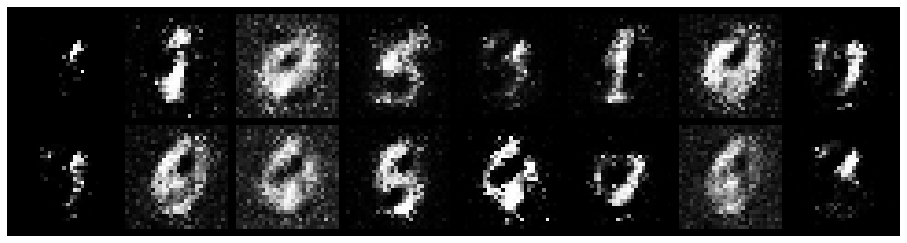

Epoch: [7/200], Batch Num: [0/600]
Discriminator Loss: 0.7320, Generator Loss: 2.4843
D(x): 0.8170, D(G(z)): 0.1882


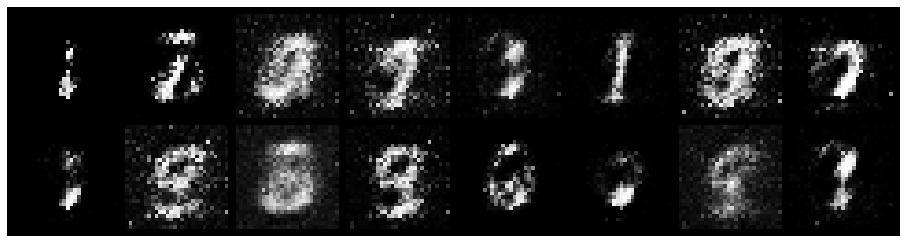

Epoch: [7/200], Batch Num: [100/600]
Discriminator Loss: 0.7817, Generator Loss: 2.8665
D(x): 0.7426, D(G(z)): 0.2332


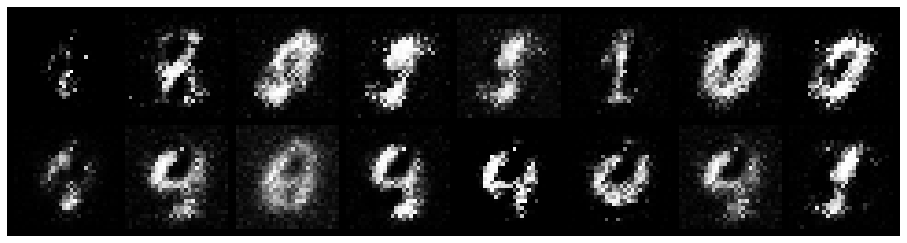

Epoch: [7/200], Batch Num: [200/600]
Discriminator Loss: 0.7886, Generator Loss: 2.0873
D(x): 0.6902, D(G(z)): 0.1813


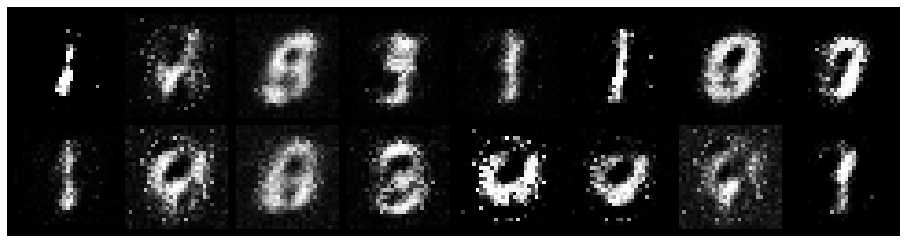

Epoch: [7/200], Batch Num: [300/600]
Discriminator Loss: 0.9887, Generator Loss: 1.6711
D(x): 0.6911, D(G(z)): 0.2291


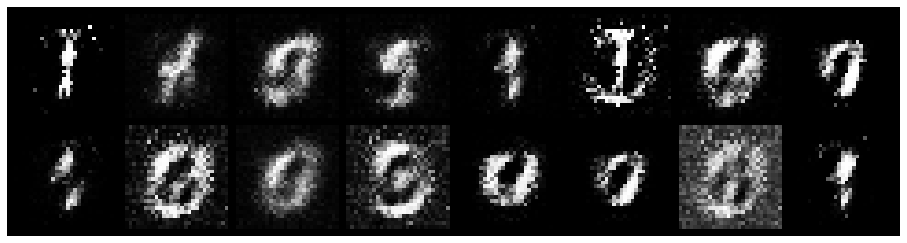

Epoch: [7/200], Batch Num: [400/600]
Discriminator Loss: 0.4932, Generator Loss: 3.3158
D(x): 0.8466, D(G(z)): 0.1554


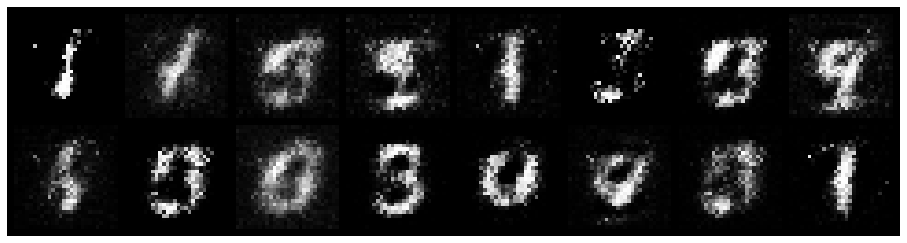

Epoch: [7/200], Batch Num: [500/600]
Discriminator Loss: 0.3156, Generator Loss: 3.0274
D(x): 0.8942, D(G(z)): 0.1260


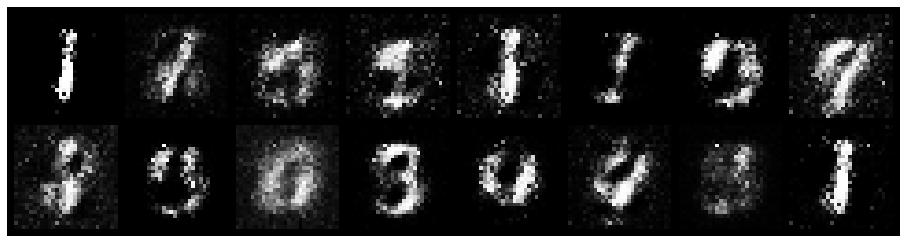

Epoch: [8/200], Batch Num: [0/600]
Discriminator Loss: 0.5488, Generator Loss: 2.3454
D(x): 0.8652, D(G(z)): 0.2027


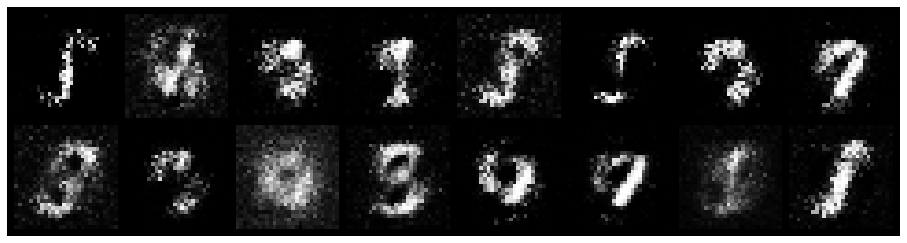

Epoch: [8/200], Batch Num: [100/600]
Discriminator Loss: 0.8954, Generator Loss: 1.5671
D(x): 0.7492, D(G(z)): 0.3304


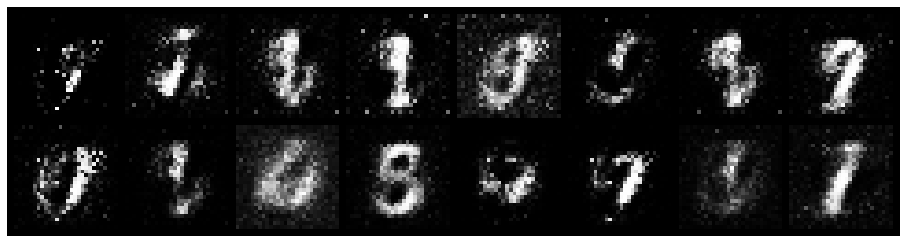

Epoch: [8/200], Batch Num: [200/600]
Discriminator Loss: 0.5855, Generator Loss: 2.3092
D(x): 0.8180, D(G(z)): 0.2159


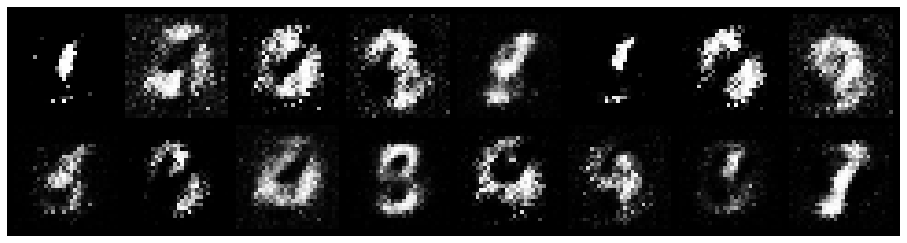

Epoch: [8/200], Batch Num: [300/600]
Discriminator Loss: 0.3729, Generator Loss: 2.3947
D(x): 0.8971, D(G(z)): 0.1808


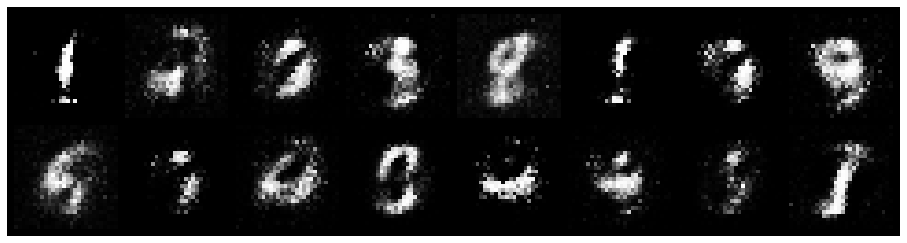

Epoch: [8/200], Batch Num: [400/600]
Discriminator Loss: 0.4014, Generator Loss: 3.1218
D(x): 0.9456, D(G(z)): 0.2106


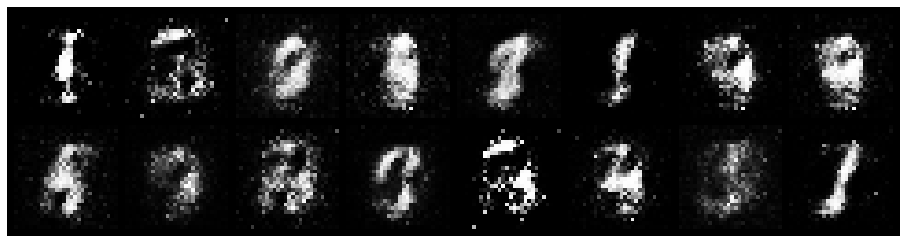

Epoch: [8/200], Batch Num: [500/600]
Discriminator Loss: 0.4539, Generator Loss: 2.4699
D(x): 0.8356, D(G(z)): 0.1524


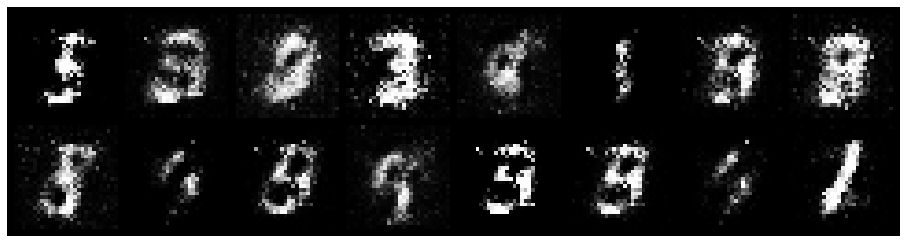

Epoch: [9/200], Batch Num: [0/600]
Discriminator Loss: 0.6699, Generator Loss: 3.2765
D(x): 0.7937, D(G(z)): 0.1854


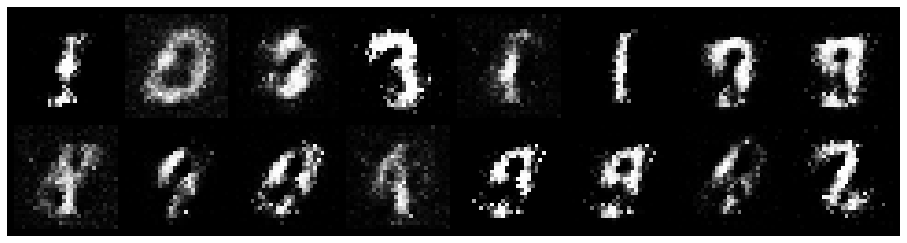

Epoch: [9/200], Batch Num: [100/600]
Discriminator Loss: 0.5860, Generator Loss: 2.9945
D(x): 0.8795, D(G(z)): 0.2731


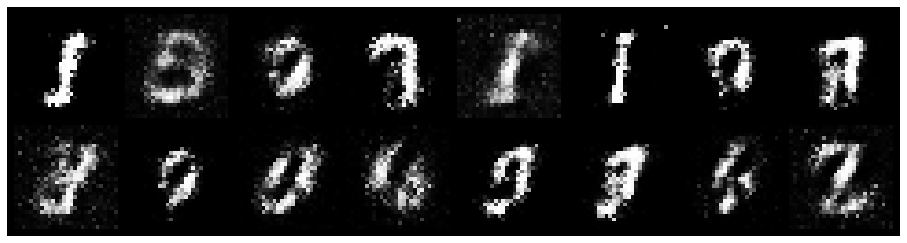

Epoch: [9/200], Batch Num: [200/600]
Discriminator Loss: 0.5949, Generator Loss: 3.3188
D(x): 0.7871, D(G(z)): 0.1641


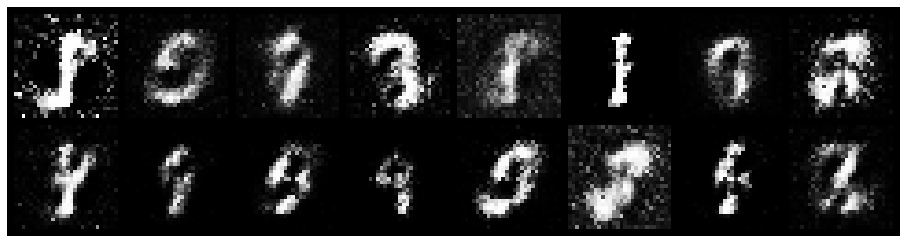

Epoch: [9/200], Batch Num: [300/600]
Discriminator Loss: 0.6500, Generator Loss: 1.9036
D(x): 0.7944, D(G(z)): 0.2274


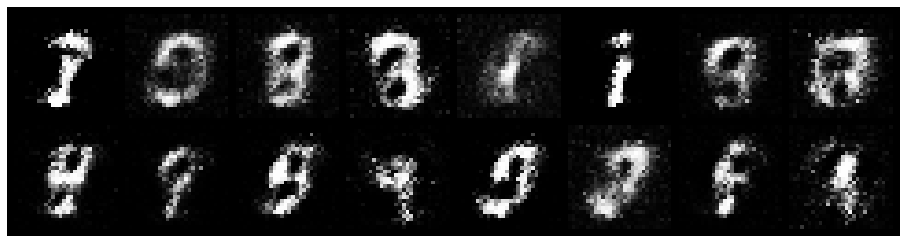

Epoch: [9/200], Batch Num: [400/600]
Discriminator Loss: 0.7681, Generator Loss: 1.6205
D(x): 0.7244, D(G(z)): 0.2212


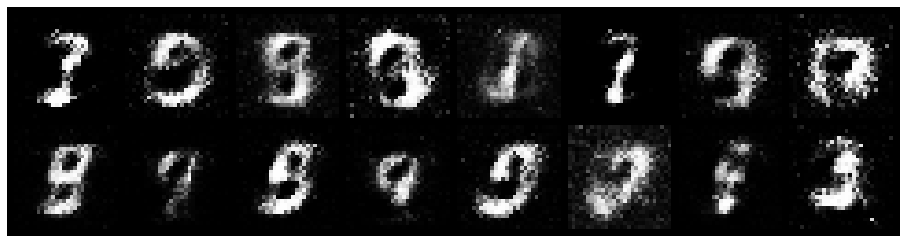

Epoch: [9/200], Batch Num: [500/600]
Discriminator Loss: 0.8250, Generator Loss: 1.5266
D(x): 0.8528, D(G(z)): 0.3492


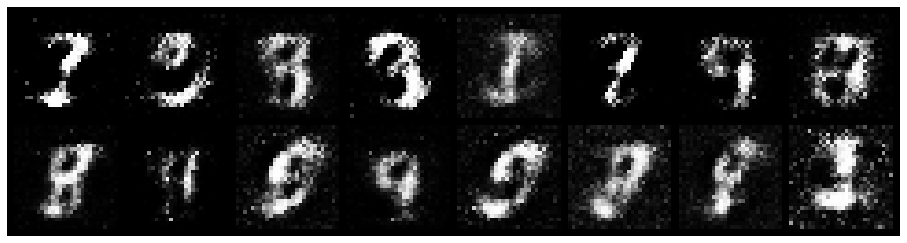

Epoch: [10/200], Batch Num: [0/600]
Discriminator Loss: 0.8777, Generator Loss: 1.8406
D(x): 0.8529, D(G(z)): 0.3502


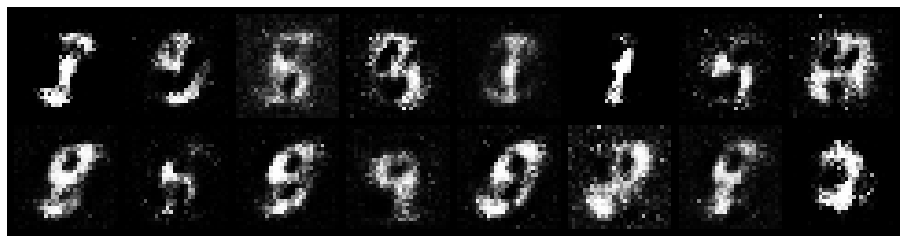

Epoch: [10/200], Batch Num: [100/600]
Discriminator Loss: 0.4972, Generator Loss: 2.6493
D(x): 0.8361, D(G(z)): 0.1804


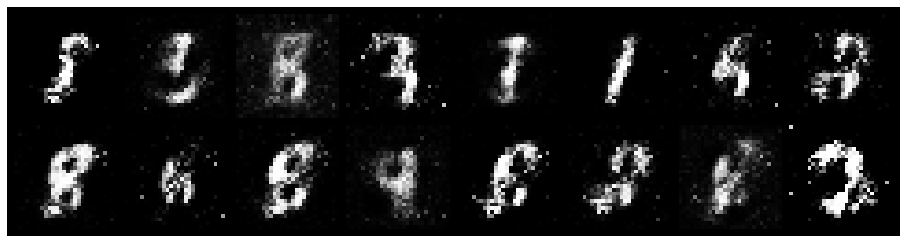

Epoch: [10/200], Batch Num: [200/600]
Discriminator Loss: 0.6724, Generator Loss: 3.0459
D(x): 0.7383, D(G(z)): 0.1729


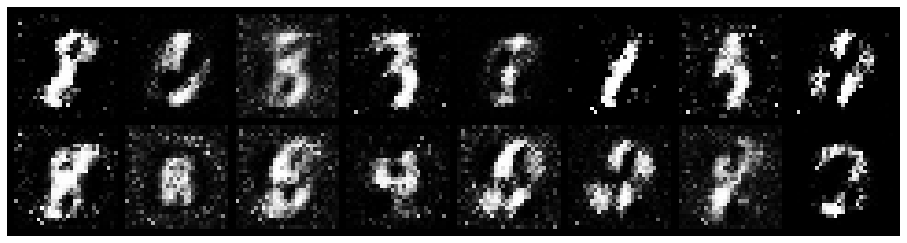

Epoch: [10/200], Batch Num: [300/600]
Discriminator Loss: 0.5045, Generator Loss: 2.9235
D(x): 0.8502, D(G(z)): 0.1657


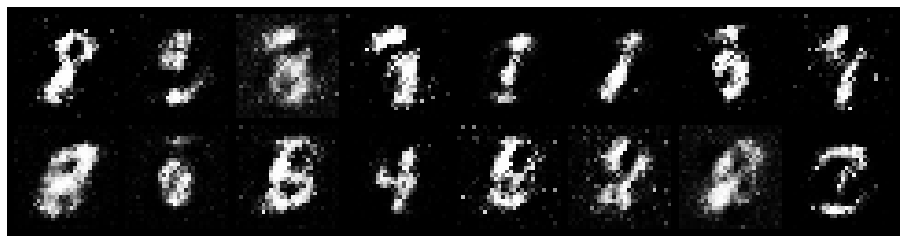

Epoch: [10/200], Batch Num: [400/600]
Discriminator Loss: 0.5126, Generator Loss: 1.8520
D(x): 0.8382, D(G(z)): 0.2068


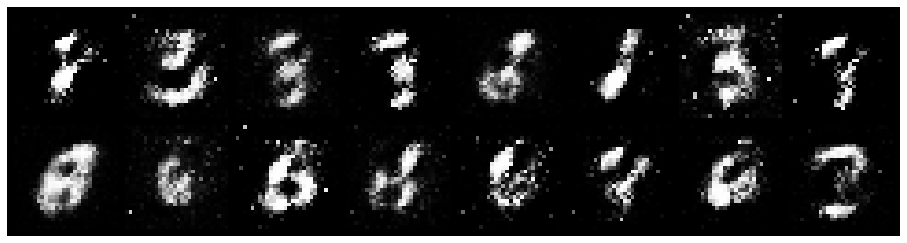

Epoch: [10/200], Batch Num: [500/600]
Discriminator Loss: 0.4346, Generator Loss: 2.5248
D(x): 0.8213, D(G(z)): 0.1238


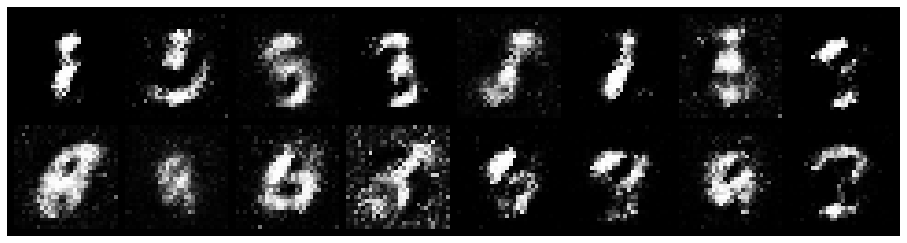

Epoch: [11/200], Batch Num: [0/600]
Discriminator Loss: 0.6814, Generator Loss: 1.9594
D(x): 0.7749, D(G(z)): 0.2282


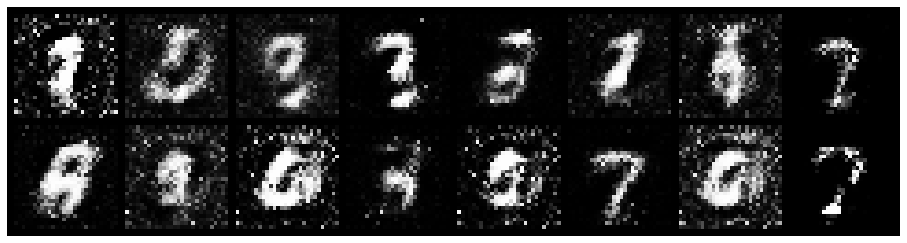

Epoch: [11/200], Batch Num: [100/600]
Discriminator Loss: 0.8608, Generator Loss: 1.5555
D(x): 0.7249, D(G(z)): 0.2937


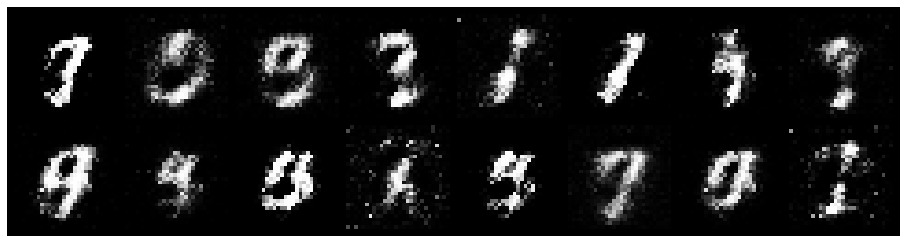

Epoch: [11/200], Batch Num: [200/600]
Discriminator Loss: 0.4168, Generator Loss: 2.4317
D(x): 0.8452, D(G(z)): 0.1333


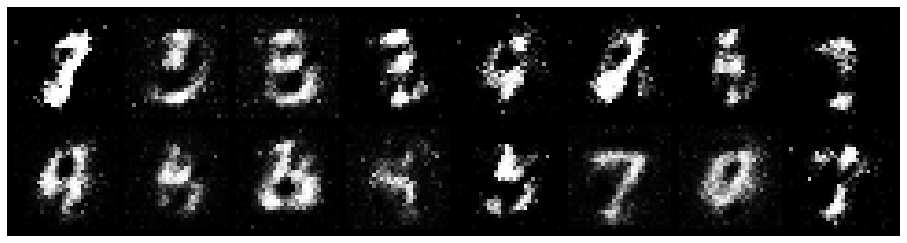

Epoch: [11/200], Batch Num: [300/600]
Discriminator Loss: 0.6692, Generator Loss: 1.9956
D(x): 0.7940, D(G(z)): 0.2334


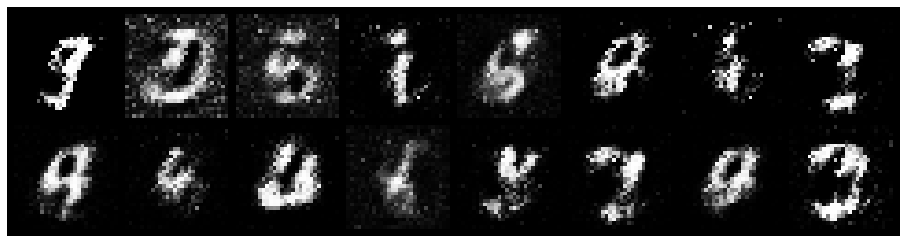

Epoch: [11/200], Batch Num: [400/600]
Discriminator Loss: 0.7703, Generator Loss: 1.7061
D(x): 0.7390, D(G(z)): 0.2655


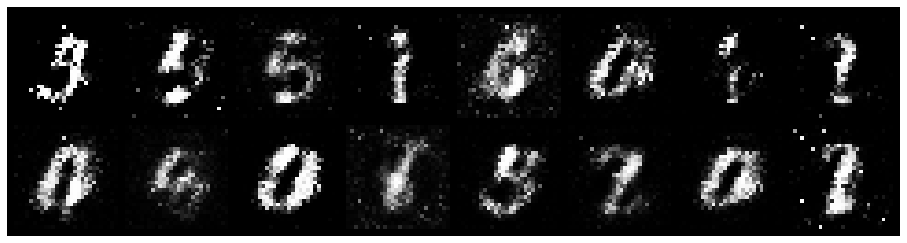

Epoch: [11/200], Batch Num: [500/600]
Discriminator Loss: 0.8254, Generator Loss: 1.8761
D(x): 0.7093, D(G(z)): 0.2329


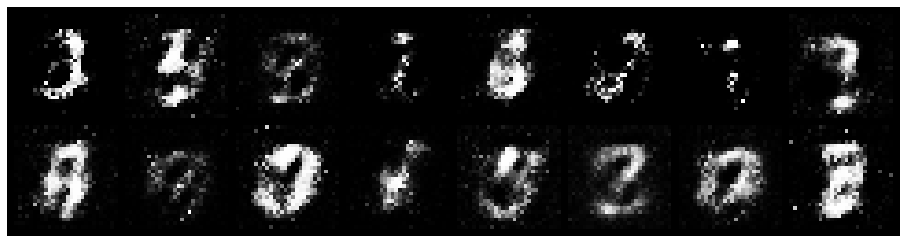

Epoch: [12/200], Batch Num: [0/600]
Discriminator Loss: 0.7639, Generator Loss: 1.7678
D(x): 0.7651, D(G(z)): 0.2478


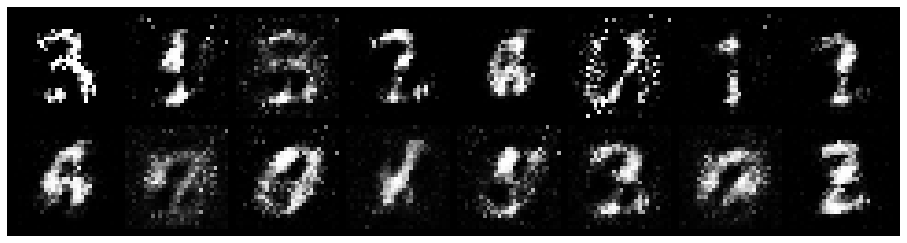

Epoch: [12/200], Batch Num: [100/600]
Discriminator Loss: 0.7689, Generator Loss: 1.5866
D(x): 0.7834, D(G(z)): 0.3131


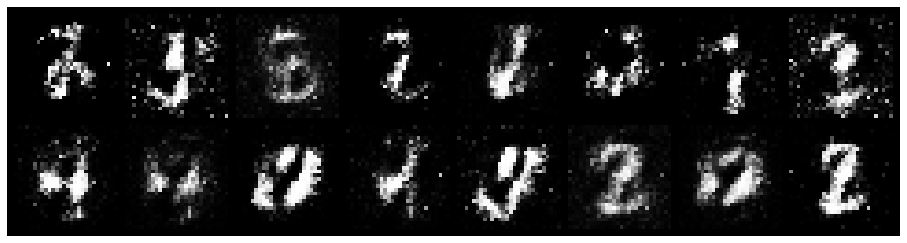

Epoch: [12/200], Batch Num: [200/600]
Discriminator Loss: 0.6447, Generator Loss: 2.0059
D(x): 0.7889, D(G(z)): 0.2555


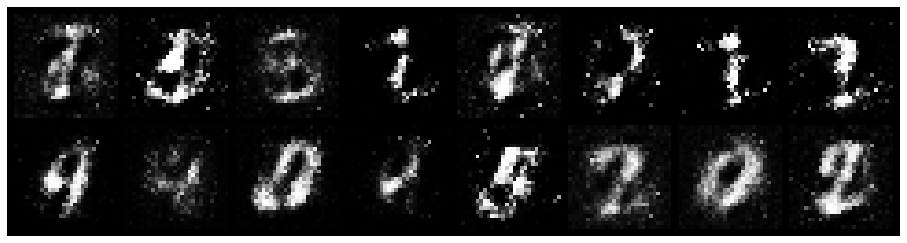

Epoch: [12/200], Batch Num: [300/600]
Discriminator Loss: 0.7364, Generator Loss: 2.0252
D(x): 0.7355, D(G(z)): 0.2146


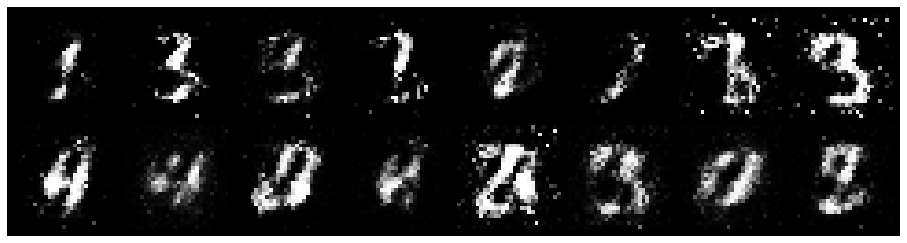

Epoch: [12/200], Batch Num: [400/600]
Discriminator Loss: 0.4452, Generator Loss: 2.4946
D(x): 0.8691, D(G(z)): 0.1851


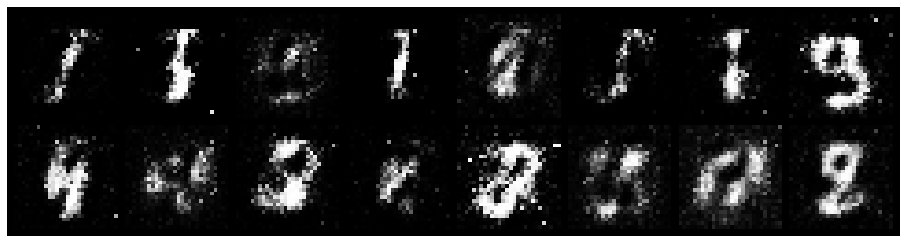

Epoch: [12/200], Batch Num: [500/600]
Discriminator Loss: 0.6919, Generator Loss: 2.4216
D(x): 0.7171, D(G(z)): 0.1388


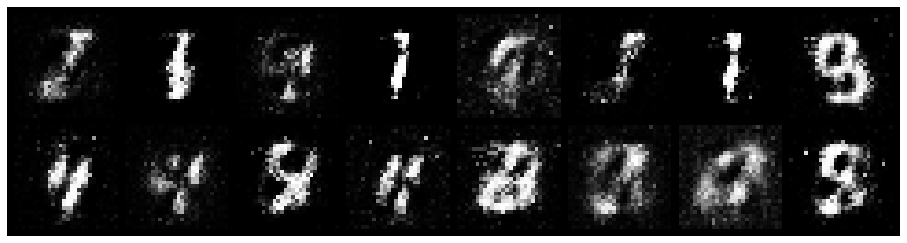

Epoch: [13/200], Batch Num: [0/600]
Discriminator Loss: 0.9213, Generator Loss: 2.1865
D(x): 0.7234, D(G(z)): 0.2465


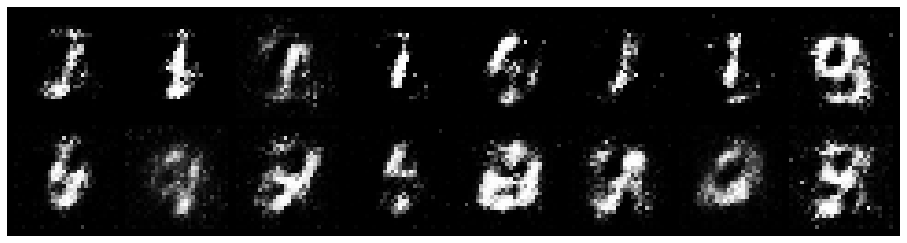

Epoch: [13/200], Batch Num: [100/600]
Discriminator Loss: 1.1475, Generator Loss: 1.6276
D(x): 0.7182, D(G(z)): 0.4132


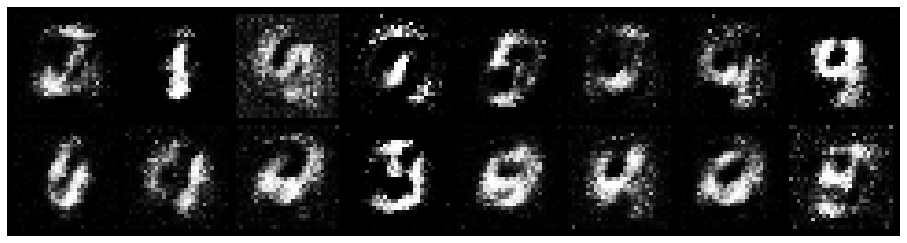

Epoch: [13/200], Batch Num: [200/600]
Discriminator Loss: 0.8000, Generator Loss: 2.2058
D(x): 0.8165, D(G(z)): 0.3386


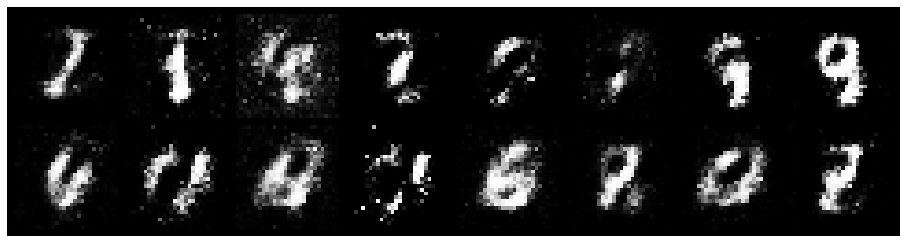

Epoch: [13/200], Batch Num: [300/600]
Discriminator Loss: 0.9235, Generator Loss: 1.3067
D(x): 0.7046, D(G(z)): 0.3356


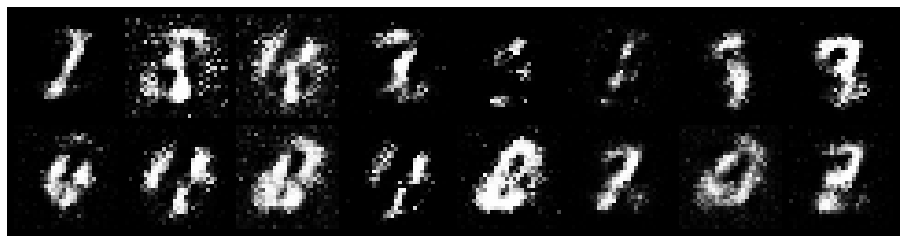

Epoch: [13/200], Batch Num: [400/600]
Discriminator Loss: 0.9932, Generator Loss: 1.9723
D(x): 0.7558, D(G(z)): 0.3393


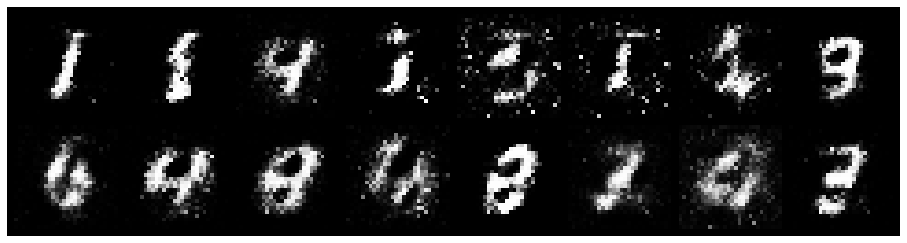

Epoch: [13/200], Batch Num: [500/600]
Discriminator Loss: 0.9498, Generator Loss: 1.6990
D(x): 0.7234, D(G(z)): 0.3111


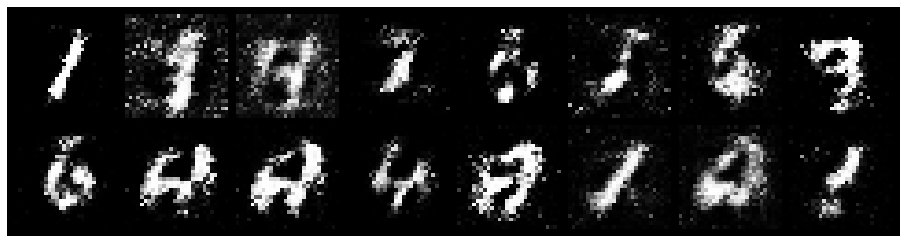

Epoch: [14/200], Batch Num: [0/600]
Discriminator Loss: 0.8126, Generator Loss: 1.5792
D(x): 0.7758, D(G(z)): 0.3174


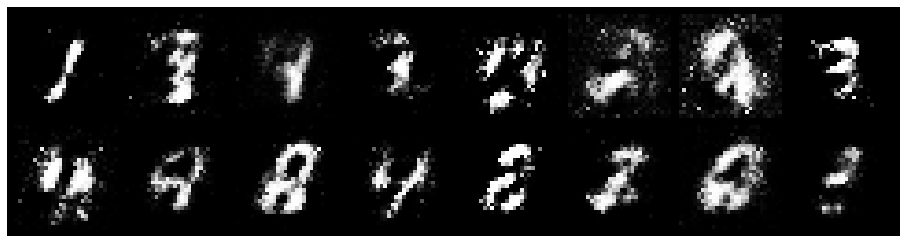

Epoch: [14/200], Batch Num: [100/600]
Discriminator Loss: 1.1186, Generator Loss: 1.5158
D(x): 0.6331, D(G(z)): 0.3306


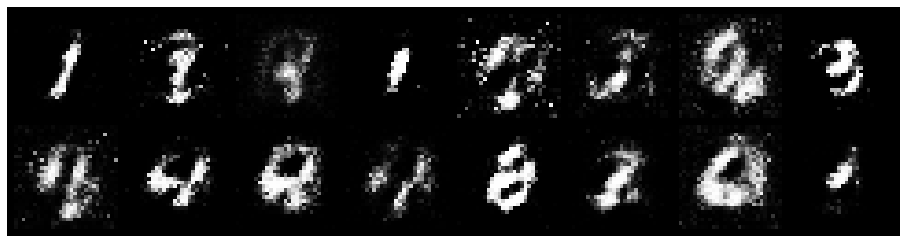

Epoch: [14/200], Batch Num: [200/600]
Discriminator Loss: 1.0277, Generator Loss: 1.3860
D(x): 0.6483, D(G(z)): 0.3128


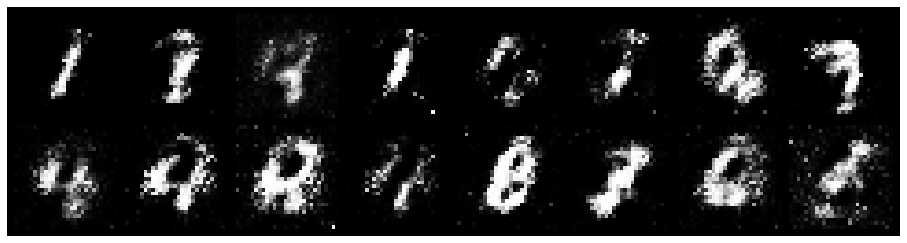

Epoch: [14/200], Batch Num: [300/600]
Discriminator Loss: 0.9354, Generator Loss: 1.6906
D(x): 0.7752, D(G(z)): 0.3778


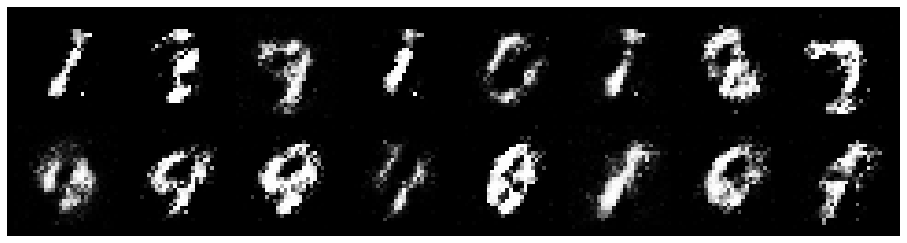

Epoch: [14/200], Batch Num: [400/600]
Discriminator Loss: 0.7824, Generator Loss: 1.4426
D(x): 0.7261, D(G(z)): 0.2742


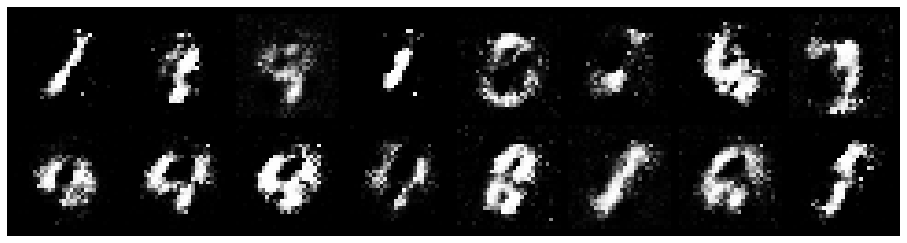

Epoch: [14/200], Batch Num: [500/600]
Discriminator Loss: 1.0120, Generator Loss: 1.5454
D(x): 0.6726, D(G(z)): 0.2953


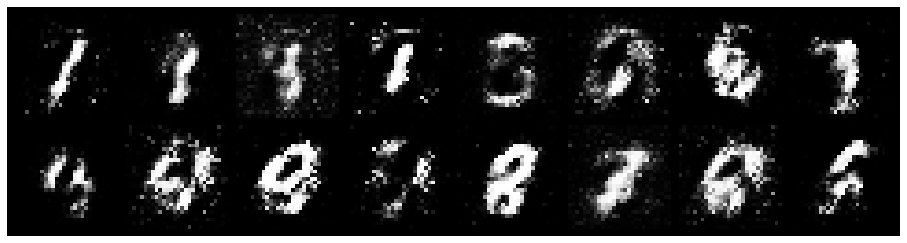

Epoch: [15/200], Batch Num: [0/600]
Discriminator Loss: 0.7575, Generator Loss: 1.8063
D(x): 0.7397, D(G(z)): 0.2390


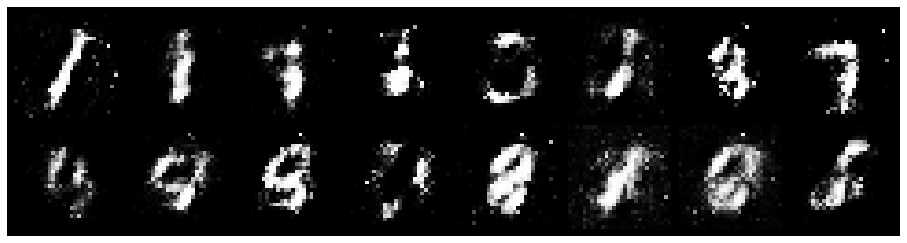

Epoch: [15/200], Batch Num: [100/600]
Discriminator Loss: 0.9715, Generator Loss: 2.0501
D(x): 0.6268, D(G(z)): 0.1787


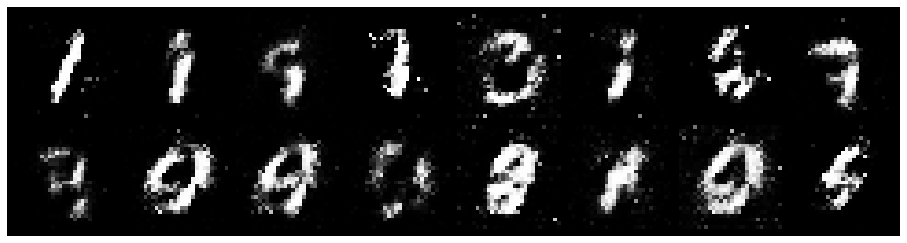

Epoch: [15/200], Batch Num: [200/600]
Discriminator Loss: 0.8706, Generator Loss: 1.8900
D(x): 0.6673, D(G(z)): 0.2005


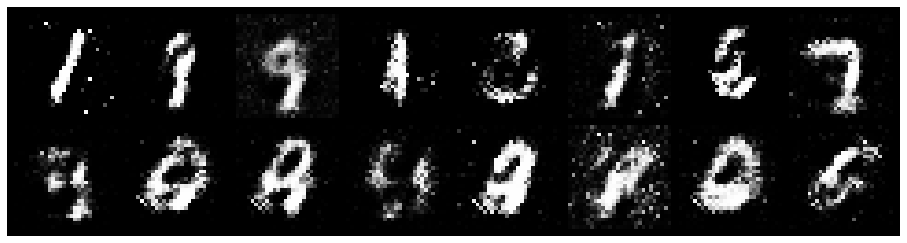

Epoch: [15/200], Batch Num: [300/600]
Discriminator Loss: 0.6868, Generator Loss: 1.7218
D(x): 0.7667, D(G(z)): 0.2705


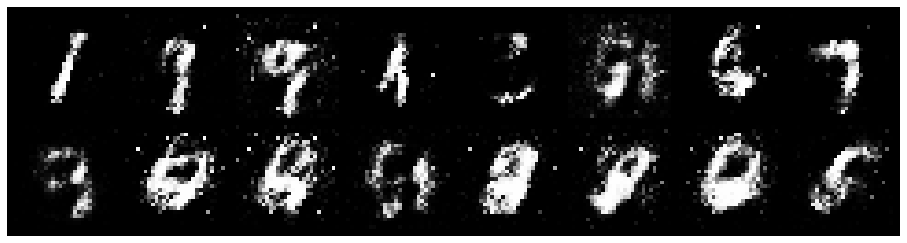

Epoch: [15/200], Batch Num: [400/600]
Discriminator Loss: 0.7297, Generator Loss: 1.5158
D(x): 0.7568, D(G(z)): 0.2665


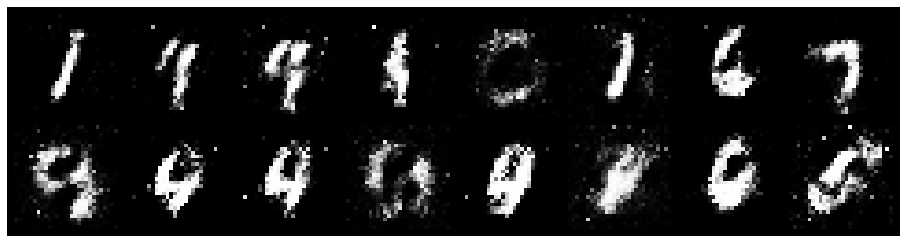

Epoch: [15/200], Batch Num: [500/600]
Discriminator Loss: 0.7348, Generator Loss: 1.4045
D(x): 0.7584, D(G(z)): 0.2634


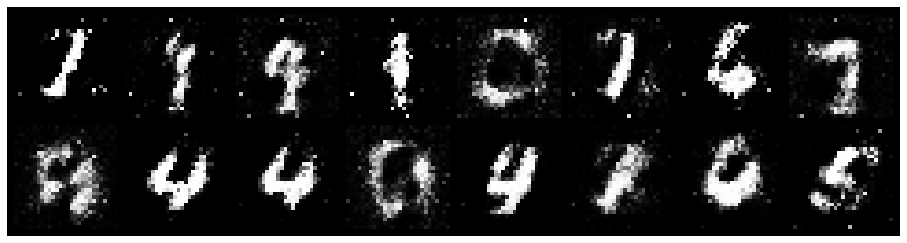

Epoch: [16/200], Batch Num: [0/600]
Discriminator Loss: 0.6326, Generator Loss: 2.2542
D(x): 0.7377, D(G(z)): 0.1724


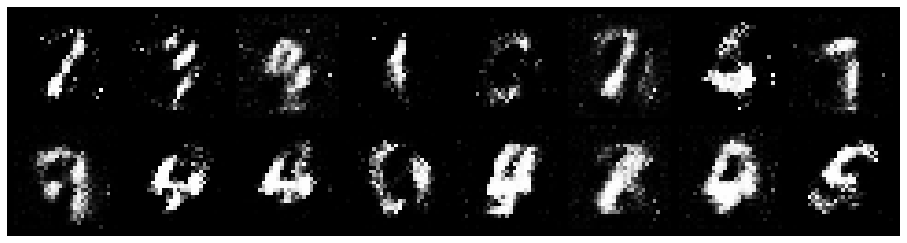

Epoch: [16/200], Batch Num: [100/600]
Discriminator Loss: 0.7966, Generator Loss: 1.9158
D(x): 0.7646, D(G(z)): 0.2752


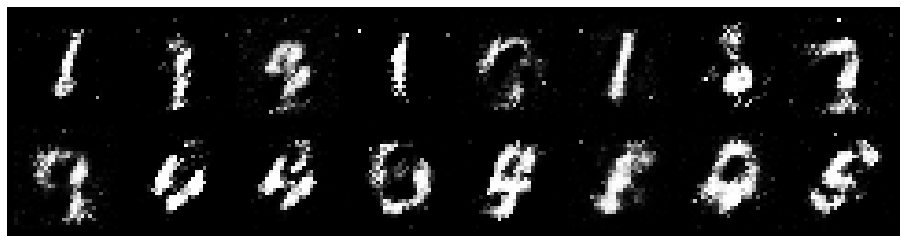

Epoch: [16/200], Batch Num: [200/600]
Discriminator Loss: 0.7457, Generator Loss: 2.3236
D(x): 0.7131, D(G(z)): 0.2124


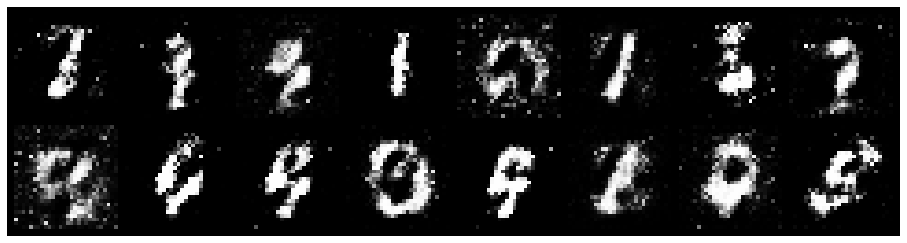

Epoch: [16/200], Batch Num: [300/600]
Discriminator Loss: 0.7104, Generator Loss: 2.0272
D(x): 0.7278, D(G(z)): 0.2308


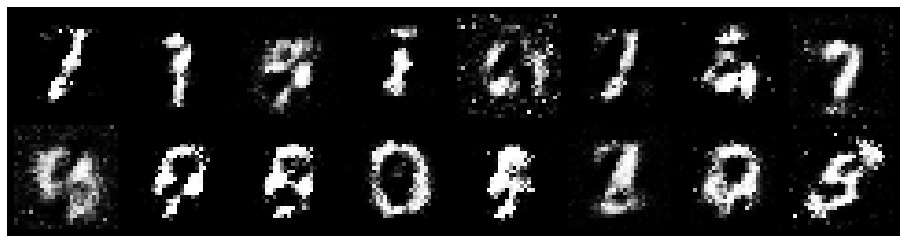

Epoch: [16/200], Batch Num: [400/600]
Discriminator Loss: 0.9593, Generator Loss: 1.3583
D(x): 0.7586, D(G(z)): 0.3802


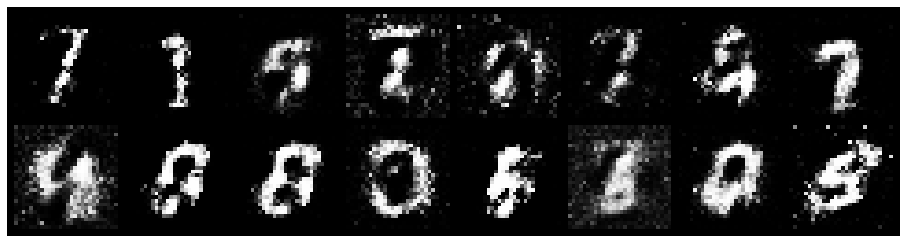

Epoch: [16/200], Batch Num: [500/600]
Discriminator Loss: 1.1110, Generator Loss: 1.2029
D(x): 0.7084, D(G(z)): 0.4230


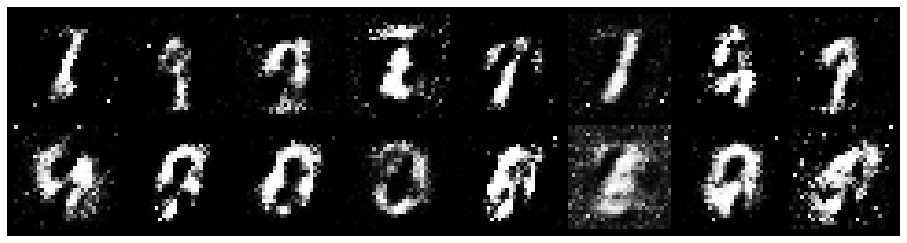

Epoch: [17/200], Batch Num: [0/600]
Discriminator Loss: 0.7143, Generator Loss: 2.1577
D(x): 0.7347, D(G(z)): 0.2136


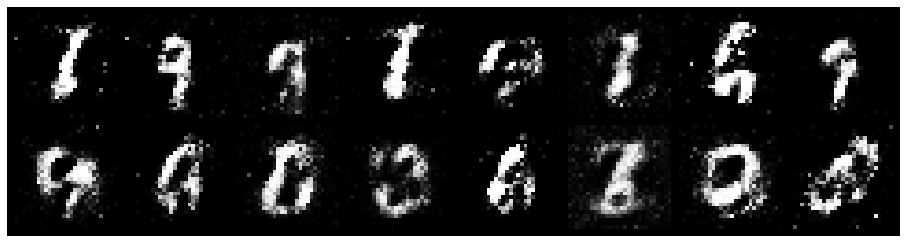

Epoch: [17/200], Batch Num: [100/600]
Discriminator Loss: 0.9218, Generator Loss: 2.6928
D(x): 0.6989, D(G(z)): 0.2323


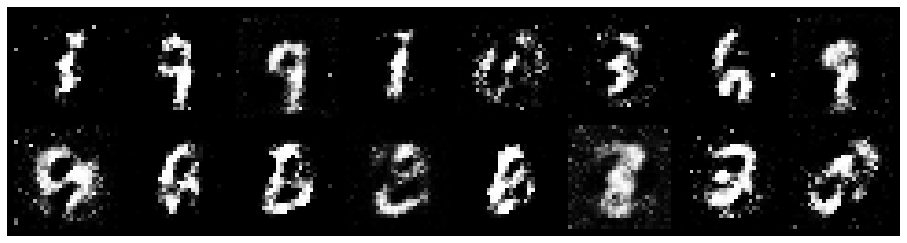

Epoch: [17/200], Batch Num: [200/600]
Discriminator Loss: 1.0324, Generator Loss: 1.4250
D(x): 0.7502, D(G(z)): 0.3706


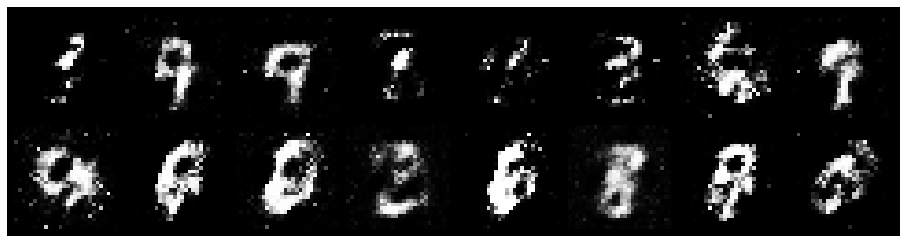

Epoch: [17/200], Batch Num: [300/600]
Discriminator Loss: 1.0105, Generator Loss: 1.3918
D(x): 0.6556, D(G(z)): 0.3059


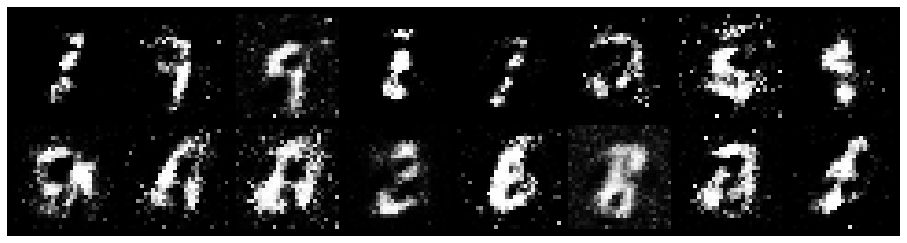

Epoch: [17/200], Batch Num: [400/600]
Discriminator Loss: 0.8381, Generator Loss: 1.4207
D(x): 0.7348, D(G(z)): 0.3253


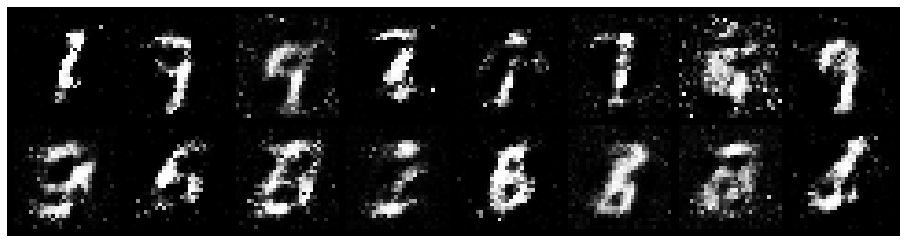

Epoch: [17/200], Batch Num: [500/600]
Discriminator Loss: 0.6737, Generator Loss: 1.5759
D(x): 0.8219, D(G(z)): 0.2969


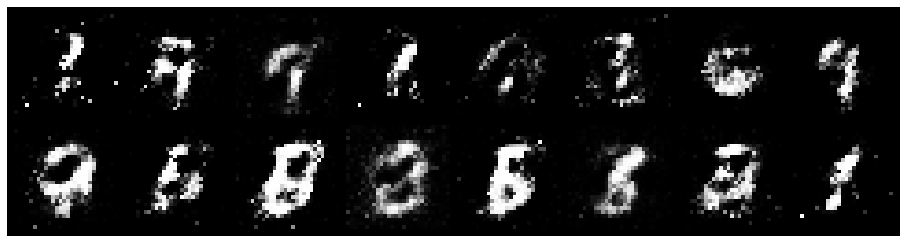

Epoch: [18/200], Batch Num: [0/600]
Discriminator Loss: 0.6457, Generator Loss: 1.9242
D(x): 0.8034, D(G(z)): 0.2540


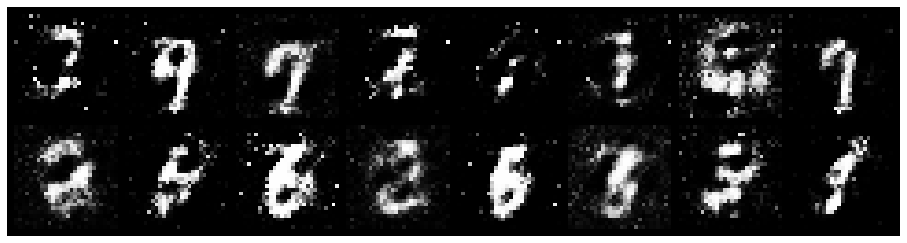

Epoch: [18/200], Batch Num: [100/600]
Discriminator Loss: 0.8331, Generator Loss: 1.8262
D(x): 0.7304, D(G(z)): 0.2714


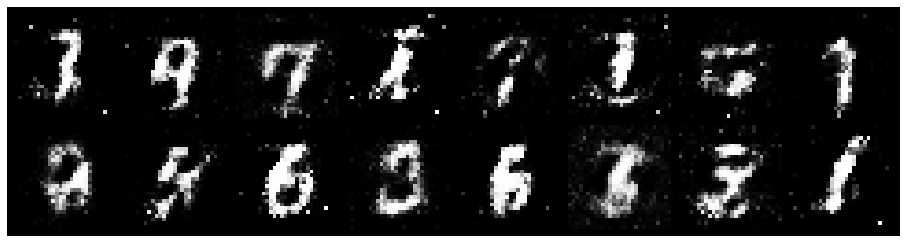

Epoch: [18/200], Batch Num: [200/600]
Discriminator Loss: 0.9749, Generator Loss: 1.7699
D(x): 0.6872, D(G(z)): 0.2574


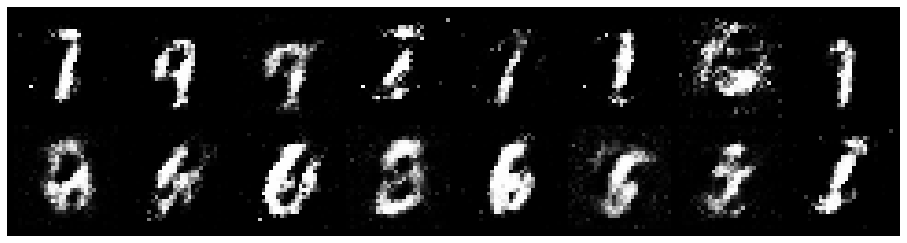

Epoch: [18/200], Batch Num: [300/600]
Discriminator Loss: 1.0280, Generator Loss: 2.3389
D(x): 0.7045, D(G(z)): 0.3214


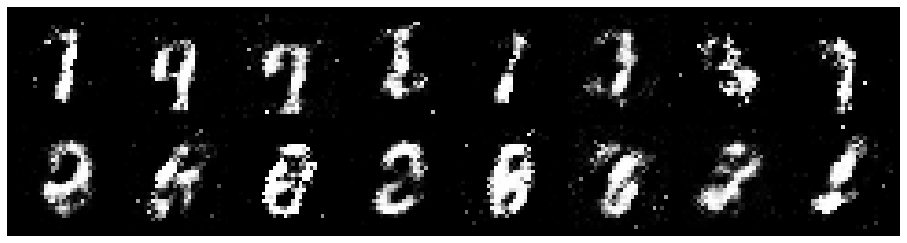

Epoch: [18/200], Batch Num: [400/600]
Discriminator Loss: 1.2232, Generator Loss: 1.2724
D(x): 0.5529, D(G(z)): 0.3264


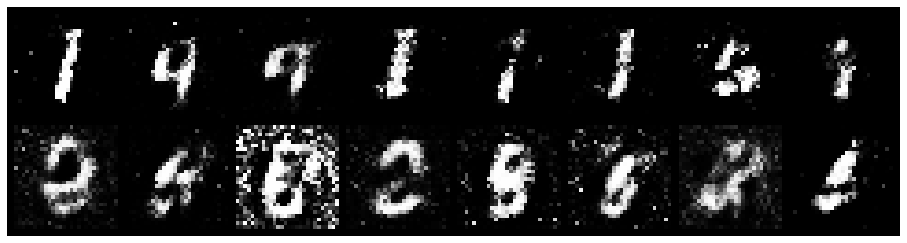

Epoch: [18/200], Batch Num: [500/600]
Discriminator Loss: 0.8743, Generator Loss: 1.5325
D(x): 0.6612, D(G(z)): 0.2591


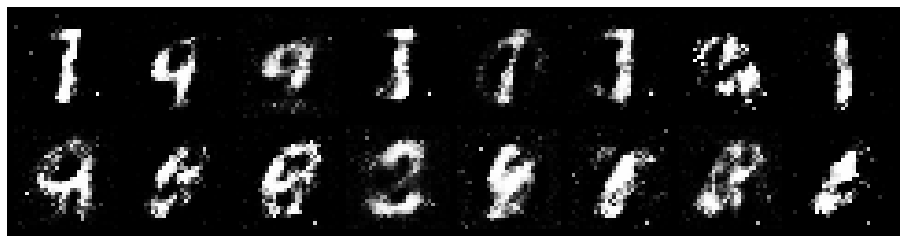

Epoch: [19/200], Batch Num: [0/600]
Discriminator Loss: 0.8965, Generator Loss: 1.4452
D(x): 0.6863, D(G(z)): 0.3132


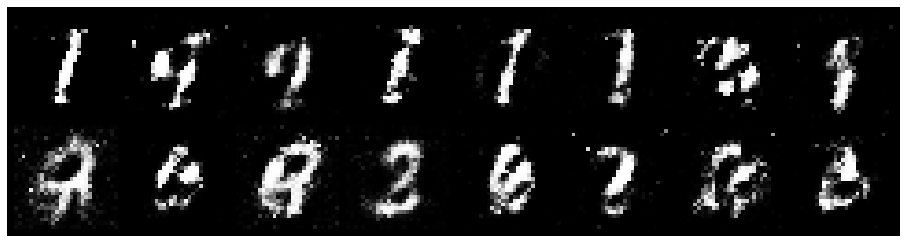

Epoch: [19/200], Batch Num: [100/600]
Discriminator Loss: 0.9220, Generator Loss: 1.4157
D(x): 0.6934, D(G(z)): 0.2934


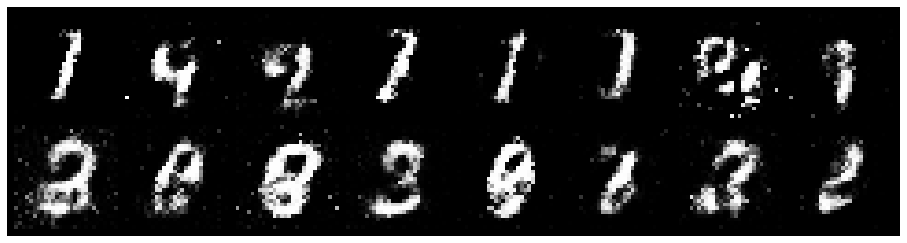

Epoch: [19/200], Batch Num: [200/600]
Discriminator Loss: 0.8352, Generator Loss: 1.9262
D(x): 0.6768, D(G(z)): 0.2256


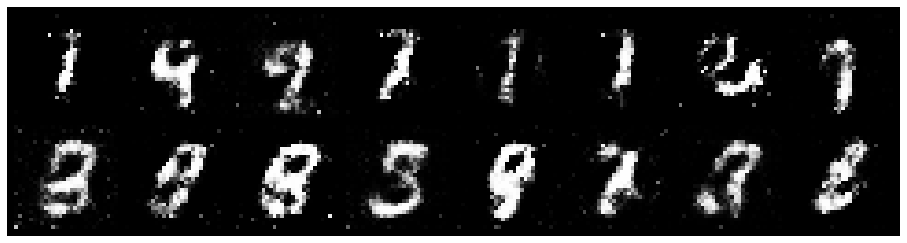

Epoch: [19/200], Batch Num: [300/600]
Discriminator Loss: 0.8394, Generator Loss: 1.5461
D(x): 0.7081, D(G(z)): 0.2839


In [0]:
# Create logger instance
logger = Logger(model_name='VGAN', data_name='MNIST')
# Total number of epochs to train
num_epochs = 200
for epoch in range(num_epochs):
    for n_batch, (real_batch,_) in enumerate(data_loader):
        N = real_batch.size(0)
        # 1. Train Discriminator
        real_data = Variable(images_to_vectors(real_batch))
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        fake_data = generator(noise(N)).detach()
        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)

        # 2. Train Generator
        # Generate fake data
        fake_data = generator(noise(N))
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if (n_batch) % 100 == 0: 
            test_images = vectors_to_images(generator(test_noise))
            test_images = test_images.data
            logger.log_images(
                test_images, num_test_samples, 
                epoch, n_batch, num_batches
            );
            # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )